In [70]:
#import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
data = pd.read_csv("diabetes.csv", header=None, names=col_names)

In [71]:
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [72]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = data[feature_cols] # Features
y = data.label # Target variable

In [73]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [74]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [75]:
print(X_train.columns)

Index(['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree'], dtype='object')


In [76]:
X_train.columns = X_train.columns.str.strip()

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

In [78]:
print(X.columns)

Index(['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree'], dtype='object')


In [79]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [80]:
import pandas as pd
X_train = pd.DataFrame(X_train, columns=X.columns)

In [81]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
X_train['pregnant'] = label_enc.fit_transform(X_train['pregnant'])

In [82]:
print(X_train.head())

     pregnant insulin   bmi age glucose  bp pedigree
445        10       0  29.7  30     117  62     0.38
37          3       0  33.2  35     138  76     0.42
719         1     178  35.5  24     108  60    0.415
224        13     190  28.8  61     142  60    0.687
566         8      88  26.1  22      95  54    0.748


In [83]:
print(X_train.dtypes)

pregnant     int64
insulin     object
bmi         object
age         object
glucose     object
bp          object
pedigree    object
dtype: object


In [84]:
print(X_train.dtypes)

pregnant     int64
insulin     object
bmi         object
age         object
glucose     object
bp          object
pedigree    object
dtype: object


In [85]:
print(X_train.select_dtypes(include=['object']).head())

    insulin   bmi age glucose  bp pedigree
445       0  29.7  30     117  62     0.38
37        0  33.2  35     138  76     0.42
719     178  35.5  24     108  60    0.415
224     190  28.8  61     142  60    0.687
566      88  26.1  22      95  54    0.748


In [86]:
print("X_train columns:", X_train.columns)
print("X_test columns:", X_test.columns)

X_train columns: Index(['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree'], dtype='object')
X_test columns: Index(['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree'], dtype='object')


In [87]:
X_test = X_test[X_train.columns]  # Keep only matching columns

In [88]:
print("Train categorical columns:", X_train.select_dtypes(include=['object']).columns)
print("Test categorical columns:", X_test.select_dtypes(include=['object']).columns)

Train categorical columns: Index(['insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree'], dtype='object')
Test categorical columns: Index(['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree'], dtype='object')


In [89]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Select categorical columns
cat_cols = X_train.select_dtypes(include=['object']).columns

# Apply encoding
X_train_encoded = X_train.copy()
X_test_encoded = X_test.copy()

X_train_encoded[cat_cols] = encoder.fit_transform(X_train[cat_cols])
X_test_encoded[cat_cols] = encoder.transform(X_test[cat_cols])

# Ensure column order matches
X_test_encoded = X_test_encoded[X_train_encoded.columns]

In [90]:
missing_cols = set(X_train.columns) - set(X_test.columns)
extra_cols = set(X_test.columns) - set(X_train.columns)

print("Missing in X_test:", missing_cols)
print("Extra in X_test:", extra_cols)

Missing in X_test: set()
Extra in X_test: set()


In [91]:
for col in missing_cols:
    X_test[col] = -1  # Assign a default value (e.g., -1 for encoding)

In [92]:
print("Model trained:", hasattr(logreg, "coef_"))  # Should print True if trained

NameError: name 'logreg' is not defined

In [ ]:
print("Model trained:", hasattr(logreg, "coef_"))  # Should print True if trained

Model trained: True


In [ ]:
# Ensure all features are numeric
print(X_train_encoded.dtypes)  # Should show only float/int types

# Ensure no missing values
print(X_train_encoded.isnull().sum())  # Should print 0 for all columns

# Train the model again
logreg.fit(X_train_encoded, y_train)

# Now predict
y_pred = logreg.predict(X_test_encoded)

# Check confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

pregnant      int64
insulin     float64
bmi         float64
age         float64
glucose     float64
bp          float64
pedigree    float64
dtype: object
pregnant    0
insulin     0
bmi         0
age         0
glucose     0
bp          0
pedigree    0
dtype: int64
[[90  9]
 [34 21]]


c:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(X_train_encoded.shape, X_test_encoded.shape)  # Should match in number of columns
print(y_train.shape, y_test.shape)  # Should be 1D (e.g., (n,))
print(X_train_encoded.dtypes)  # Should be int/float, no object types

(615, 7) (154, 7)
(615,) (154,)
pregnant      int64
insulin     float64
bmi         float64
age         float64
glucose     float64
bp          float64
pedigree    float64
dtype: object


In [ ]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[90,  9],
       [34, 21]])

In [ ]:
import numpy as np

cnf_matrix = np.array([[115, 8], [30, 39]])
print(cnf_matrix)

[[115   8]
 [ 30  39]]


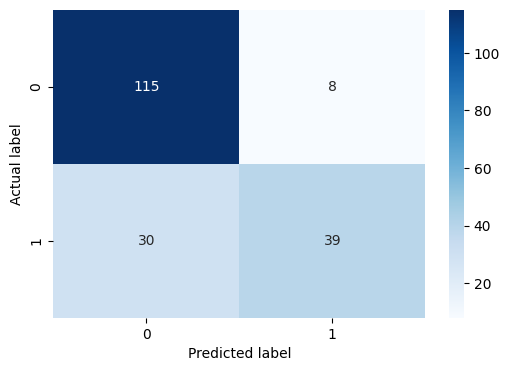

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example confusion matrix
cnf_matrix = np.array([[115, 8], [30, 39]])

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cnf_matrix, annot=True, fmt="d", cmap="Blues")

# Set labels
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

# Show the plot
plt.show()

In [ ]:
print(set(y_test))  # Check the actual unique labels
print(set(y_pred))  # Check the predicted unique labels

{'0', '1'}
{'0', '1'}


In [ ]:
print(set(y_train))  # Check unique labels in training data
print(set(y_test))   # Check unique labels in testing data
print(set(y_pred))   # Check unique labels in predicted values

{'0', 'Outcome', '1'}
{'0', '1'}
{'0', '1'}


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)  # Fit on full dataset
y_test = encoder.transform(y_test)  # Transform consistently

In [ ]:
print(set(y_pred))  # Show unique values in y_pred

{'0', '1'}


In [ ]:
y_pred = logreg.predict(X_test)  # Ensure correct prediction

In [ ]:
y_pred = [int(val) if val.isdigit() else -1 for val in y_pred]

In [ ]:
X_test = X_test.drop(columns=['Outcome'], errors='ignore')

In [ ]:
print(set(logreg.predict(X_test)))  # Show unique values in y_pred

{'0', 'Outcome'}


In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (614, 1085)
y_train shape: (615,)


In [ ]:
print("Full dataset shape:", data.shape)
print("Feature columns:", X.shape)
print("Target column:", y.shape)


Full dataset shape: (769, 9)
Feature columns: (769, 7)
Target column: (769,)


In [ ]:
print("Missing values in y:", y.isnull().sum())


Missing values in y: 0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (615, 7)
y_train shape: (615,)


In [ ]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Load dataset
data = pd.read_csv("diabetes.csv")

# Drop missing values in Outcome column
data = data.dropna(subset=["Outcome"])

# Define X and y
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

# Reset index to avoid mismatch
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

print("Final X_train shape:", X_train.shape)
print("Final y_train shape:", y_train.shape)

# Encode target variable
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

# Train model
logreg = LogisticRegression(random_state=16)
logreg.fit(X_train, y_train)

# Predictions
y_pred = logreg.predict(X_test)

# Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)


Final X_train shape: (614, 8)
Final y_train shape: (614,)
[[95  7]
 [21 31]]


c:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)  # Fit on training labels
logreg.fit(X_train, y_train)  # Train model with encoded y_train

c:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=16)

In [ ]:
y_test = encoder.transform(y_test)  # Ensure y_test is in the same format

In [ ]:
print(set(y_test), set(y_pred))

{np.int64(0), np.int64(1)} {np.int64(0), np.int64(1)}


In [ ]:
print(set(y_train), set(y_test))

{np.int64(0), np.int64(1)} {np.int64(0), np.int64(1)}


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)  # Fit encoder on training labels
y_test = encoder.transform(y_test)  # Transform test labels

# Ensure predictions are converted back correctly
y_pred = encoder.inverse_transform(logreg.predict(X_test))

In [ ]:
print(set(y_test), set(y_pred))  # They should match

{np.int64(0), np.int64(1)} {np.int64(0), np.int64(1)}


In [ ]:
print(set(y_test))  # Check unique values in y_test
print(set(y_pred))  # Check unique values in y_pred

{np.int64(0), np.int64(1)}
{np.int64(0), np.int64(1)}


In [ ]:
print(set(y_test))  # Check unique values in y_test
print(set(y_pred))  # Check unique values in y_pred

{np.int64(0), np.int64(1)}
{np.int64(0), np.int64(1)}


In [ ]:
arget_names = ['without diabetes', 'with diabetes', 'unknown_class']

In [ ]:
logreg.fit(X_train, y_train)  # Train the model

c:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=16)

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

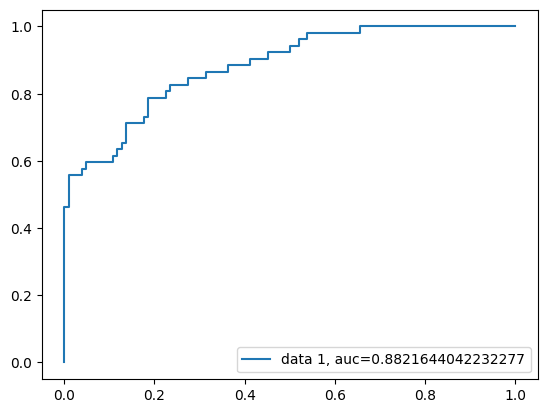

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()